# **Task #5 - To explore Business Analytics**

* Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.
* What all business problems you can derive by looking into the data? You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel)
* Dataset: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [ ]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Mounting from the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading the dataset
df=pd.read_csv('/content/drive/My Drive/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Printing the last 5 rows of dataset
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
#Checking for missing values/Null values
df.isnull().sum() 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#droping all the coulmns not requried for analysis.
df=df.drop(['Country','Postal Code'],axis=1) 

In [ ]:
#checking for numerical and categorical coulmns
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Exploring the dataset
df.shape

(9994, 11)

In [ ]:
#Printing the column names
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#Checking for unique values
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#Printing unique values for particular column
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
#Checking for the duplicate values
df.duplicated().sum()

50

In [ ]:
#Dropping the duplicate values
df.drop_duplicates(inplace = True)
#Now checking sum of duplicate values
df.duplicated().sum()

0

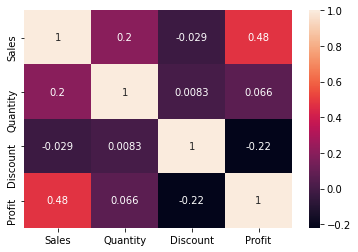

In [ ]:
#Relationship analysis and visualising the dataset
correlation = df.corr()
#Heatmap
sns.heatmap(correlation,annot=True)

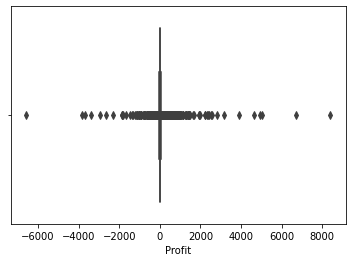

In [ ]:
#Boxplot
sns.boxplot(df['Profit'])

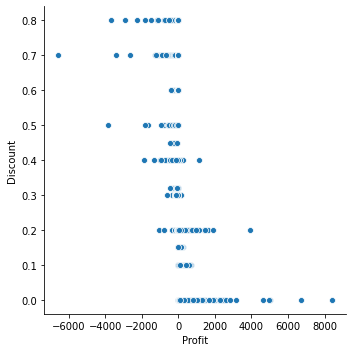

In [ ]:
#Relation plot
sns.relplot(x='Profit',y='Discount',data=df)

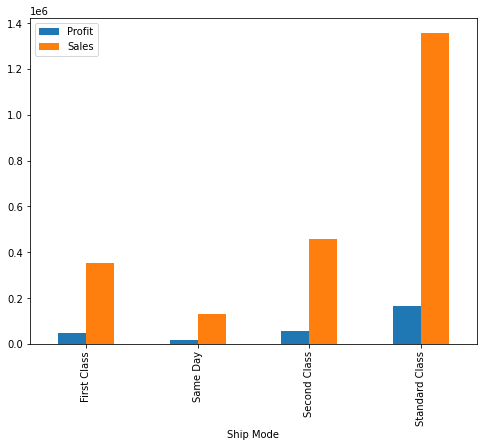

In [ ]:
df.groupby('Ship Mode').sum()[['Profit','Sales']].plot.bar(figsize=(8,6))

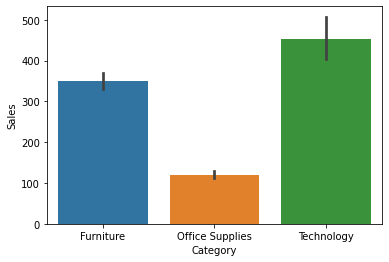

In [ ]:
sns.barplot(df['Category'],df['Sales'])

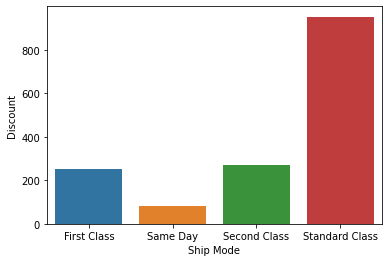

In [ ]:
disc = df.groupby(['Ship Mode'], as_index = False)['Discount'].sum()
sns.barplot(disc['Ship Mode'], disc['Discount'])

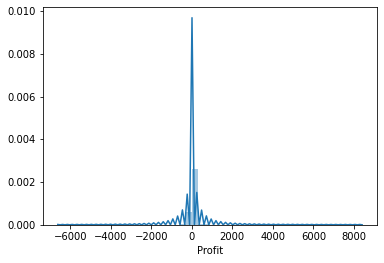

In [ ]:
sns.distplot(df['Profit'])

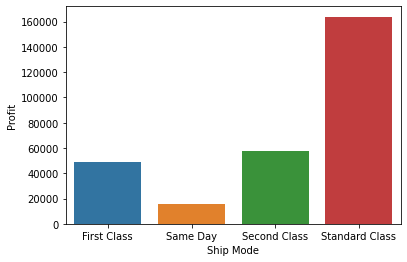

In [ ]:
vis = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(vis['Ship Mode'], vis['Profit'])

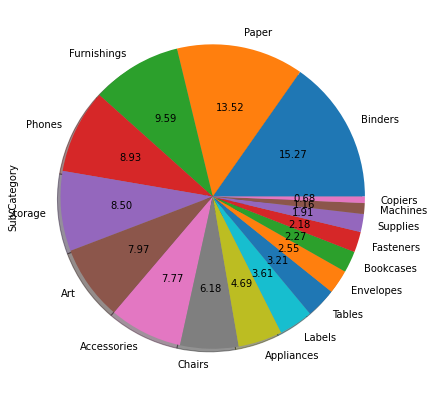

In [ ]:
fig,ax= plt.subplots(figsize=(7,7))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True) #the overall count for sub-categories

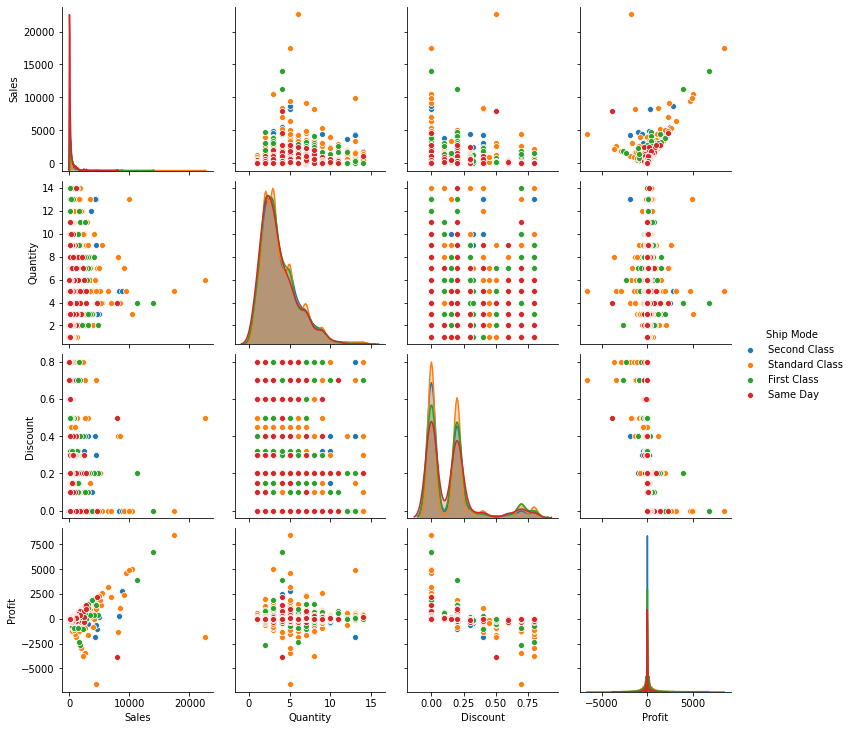

In [ ]:
sns.pairplot(df, hue="Ship Mode")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

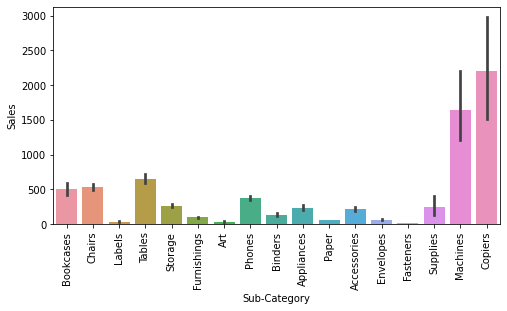

In [ ]:
fig= plt.figure(figsize=(8,4))
sns.barplot(df['Sub-Category'],df['Sales'])
plt.xticks(rotation= 90)

([<matplotlib.patches.Wedge at 0x7fba86f9a358>,
 [Text(0.975828498842488, 0.5076994591752255, 'Central'),
  Text(-0.3151626058958701, 1.053884496443953, 'East'),
  Text(-0.9991133210878052, -0.46018753962368053, 'South'),
  Text(0.6398393399820633, -0.8947656782707515, 'West')],
 [Text(0.5322700902777207, 0.2769269777319412, '15.27%'),
  Text(-0.17190687594320186, 0.5748460889694289, '28.71%'),
  Text(-0.54497090241153, -0.2510113852492803, '25.78%'),
  Text(0.3490032763538527, -0.48805400632950074, '30.24%')])

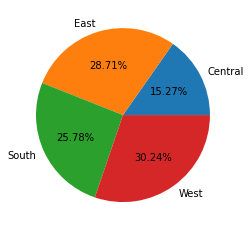

In [ ]:
#Pie chart
region = ['Central', 'East', 'South', 'West']
profit = [17.093, 32.135, 28.858, 33.849]
plt.pie(profit, labels = region, autopct='%1.2f%%')

In [ ]:
data = df.groupby(['Segment'],as_index = False).sum()
data

,Segment,Sales,Quantity,Discount,Profit
0,Consumer,1.159418e+06,19437,817.56,133939.5218
1,Corporate,7.059702e+05,11574,476.45,91911.1606
2,Home Office,4.292117e+05,6717,261.63,60246.8755


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

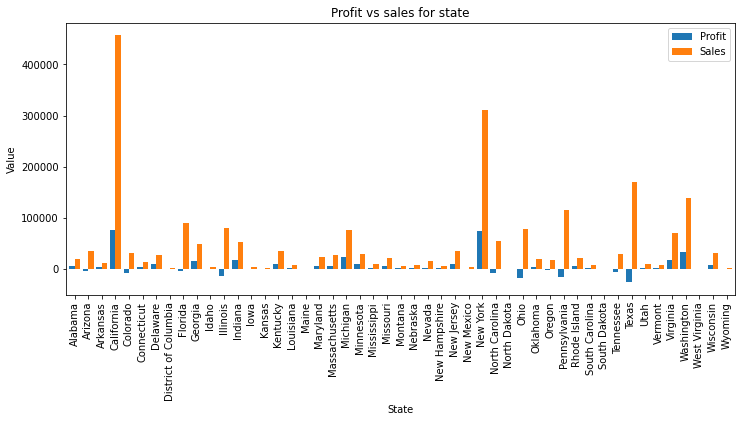

In [ ]:
fig,ax=plt.subplots()
x=np.arange(len(df['State']))
df2 =df.groupby(['State']).sum()[['Profit','Sales']].plot.bar(ax=ax,legend=True,figsize=(12,5),width=0.8)
plt.title('Profit vs sales for state')
plt.xlabel("State")
plt.ylabel('Value')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

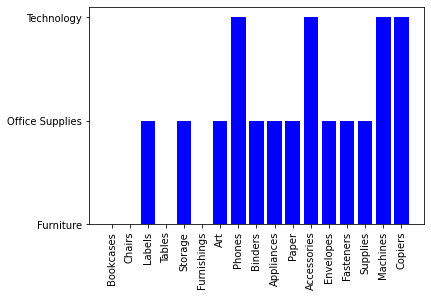

In [ ]:
fig= plt.gcf()
plt.bar('Sub-Category', 'Category',data = df,facecolor = 'b')
plt.xticks(rotation =90 )

In [ ]:
print(df.groupby(['State']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True))

                          Profit        Sales
State                                        
Texas                -25753.1635  170101.1278
Ohio                 -16959.3178   77976.7640
Pennsylvania         -15591.3148  116383.0100
Illinois             -12593.2976   80127.3690
North Carolina        -7490.9122   55603.1640
Colorado              -6527.8579   32108.1180
Tennessee             -5341.6936   30661.8730
Arizona               -3427.9246   35282.0010
Florida               -3399.3017   89473.7080
Oregon                -1194.0993   17420.7820
Wyoming                 100.1960    1603.1360
West Virginia           185.9216    1209.8240
North Dakota            230.1497     919.9100
South Dakota            394.8283    1315.5600
Maine                   454.4862    1270.5300
Idaho                   826.7231    4382.4860
Kansas                  836.4435    2914.3100
District of Columbia   1059.5893    2865.0200
New Mexico             1157.1161    4783.5220
Iowa                   1183.8119  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


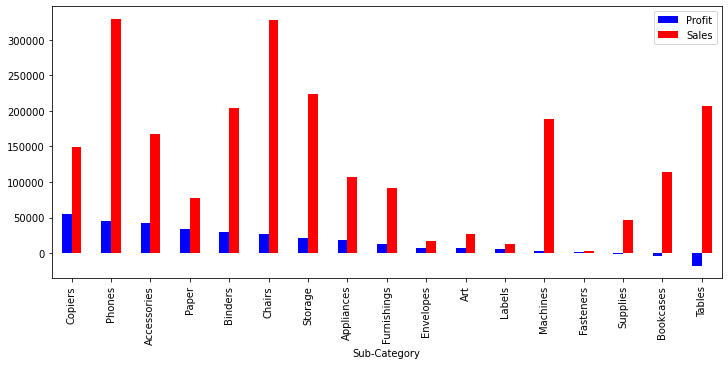

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
df2=df.groupby(df['Sub-Category'])['Profit','Sales'].sum().sort_values(by=['Profit','Sales'],ascending = False).plot.bar(color=['blue','red'])

Text(0.5, 1.0, 'City with lowest profit')

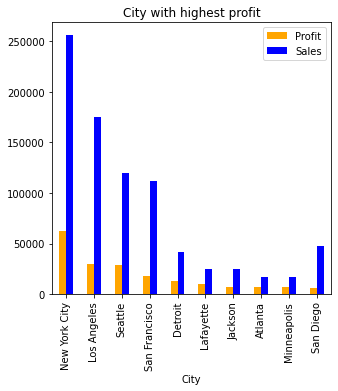

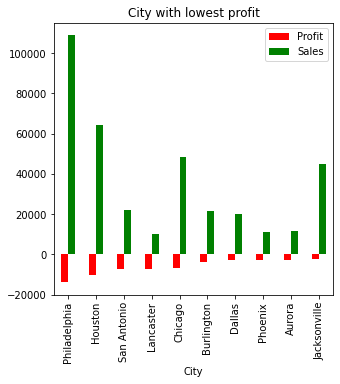

In [ ]:
df.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=False).head(10).plot.bar(figsize=(5,5),color=['orange','blue'])
plt.title('City with highest profit')

df.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True).head(10).plot.bar(figsize=(5,5),color= ['red','green'])
plt.title('City with lowest profit')

              Profit        Sales  GrossProfit
Region                                        
Central   39662.0474  500724.2708     7.920936
East      91471.0909  677843.9080    13.494418
South     46749.4303  391721.9050    11.934342
West     108214.9893  724309.2935    14.940439


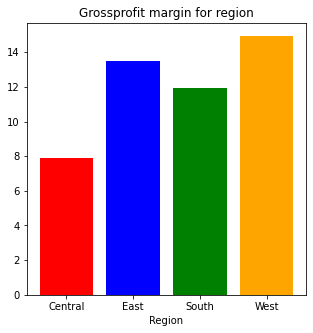

In [ ]:
fig=plt.gcf().set_size_inches(5,5)
df3=df.groupby('Region').sum()[['Profit','Sales']]
df3['GrossProfit']= (df3['Profit']/df3['Sales'])*100
plt.bar(df3.index.values,df3['GrossProfit'],color=['Red','Blue','Green','Orange'])
plt.xlabel('Region')
plt.title('Grossprofit margin for region')
print(df3)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

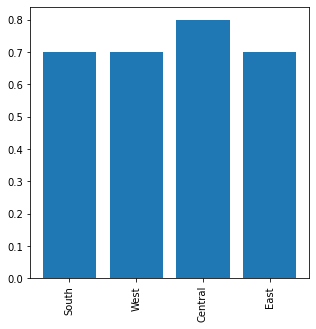

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.bar(df['Region'],df['Discount'],data=df)
plt.xticks(rotation =90)

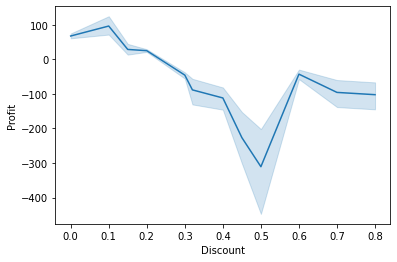

In [ ]:
sns.lineplot(y = 'Profit', x = 'Discount', data = df)

## **Result:**
* From above we can conclude that if discount is increased the profit is decreased.
* Evaluating the different regions the East region has the highest profit while Central region has lowest Profit. 
* The Consumer segment purchases more quantity while home office segment purchases least quantity. 
* The Standard Class is Earning the more Profit as it is offering more discounts and having huge sales then other classes.
* Highest discount was provided to Central however it ranks the lowest in creating profit. 
* So the company should reduce discounts on production Central region.